In [1]:
import requests
import json 
from pprint import pprint 
import pandas as pd 
import numpy as np 
from pathlib import Path
from IPython.display import clear_output 
import matplotlib.pyplot as plt 

In [26]:
# Import and read csv
victime_of_crime = pd.read_csv('victime_of_crime.csv',index_col=0)
#Combine the data into a single DataFrame
victime_of_crime_df=pd.DataFrame(victime_of_crime)
victime_of_crime_df.head(100)

,ReportedYear,Category,MCI_Category,Sex,AgeCohort,Age groups,Count,ObjectId,Average income,Median
Index_,,,,,,,,,,
224,2016,Crimes Against the Person,Assault,F,Adult,18-24,3,174,"$25,503.00","$12,800.00"
225,2016,Crimes Against the Person,Assault,F,Adult,25-34,14,175,"$88,607.00","$39,700.00"
226,2016,Crimes Against the Person,Assault,F,Adult,35-44,5,176,"$110,621.00","$53,200.00"
227,2016,Crimes Against the Person,Auto Theft,F,Adult,45-54,6,177,"$135,756.00","$53,600.00"
229,2016,Crimes Against the Person,Auto Theft,M,Adult,18-24,3,179,"$25,503.00","$12,800.00"
...,...,...,...,...,...,...,...,...,...,...
855,2021,Crimes Against the Person,Break and Enter,F,Adult,25-34,16,925,"$115,075.00","$43,900.00"
856,2021,Crimes Against the Person,Assault,F,Adult,35-44,4,926,"$132,291.00","$57,500.00"
857,2021,Crimes Against the Person,Assault,F,Adult,45-54,1,927,"$137,436.00","$55,300.00"


In [27]:
new_df = victim_of_crime[["ReportedYear","MCI_Category","Sex","Count"]]
print(new_df)
crime_list = victim_of_crime["MCI_Category"].unique()
gender_list = victim_of_crime["Sex"].unique()
reportedyear_list = victim_of_crime["ReportedYear"].unique()
print(gender_list)
print(reportedyear_list)
count = []

for i in reportedyear_list:
    new_per_df = new_df.loc[new_df["ReportedYear"] == i]
    for j in gender_list:
        new_per_df_1 = new_per_df.loc[new_df["Sex"] == j]
        for k in crime_list:
            new_per_df_2 = new_per_df_1.loc[new_df["MCI_Category"] == k]
            count.append(sum(list(new_per_df_2["Count"])))
print(count)
print(len(count))
print(count[12])

    ReportedYear     MCI_Category Sex  Count
0           2016          Assault   F      3
1           2016          Assault   F     14
2           2016          Assault   F      5
3           2016       Auto Theft   F      6
4           2016       Auto Theft   M      3
..           ...              ...  ..    ...
90          2021  Break and Enter   F     16
91          2021          Assault   F      4
92          2021          Assault   F      1
93          2021          Assault   F      3
94          2021          Assault   F      7

[95 rows x 4 columns]
['F' 'M' 'U']
[2016 2021]
[4395, 6, 38, 2493, 7581, 81, 0, 0, 6, 0, 0, 1, 4292, 0, 266, 3013, 8156, 0, 36, 5, 12, 0, 0, 5]
24
4292


[[4395, 6, 38, 2493], [7581, 81, 0, 0], [6, 0, 0, 1]]
[[4292, 0, 266, 3013], [8156, 0, 36, 5], [12, 0, 0, 5]]


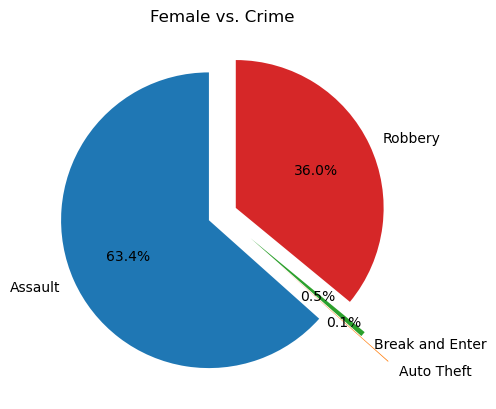

In [39]:
l = victim_of_crime["MCI_Category"].unique()
size_2016 = []
size_2021 = []
for i in range(0,int(len(count)/2),4):
    size_2016.append(count[i:i+4])
for i in range(int(len(count)/2),len(count),4):
    size_2021.append(count[i:i+4])

print(count_list_2016)
print(count_list_2021)


explode = (0.1, 0.5, 0.25, 0.1)
fig, ax = plt.subplots()
ax.pie(size_2016[0], explode=explode, labels=l, autopct='%1.1f%%',startangle=90)
ax.set_title("Female vs. Crime")
plt.show()


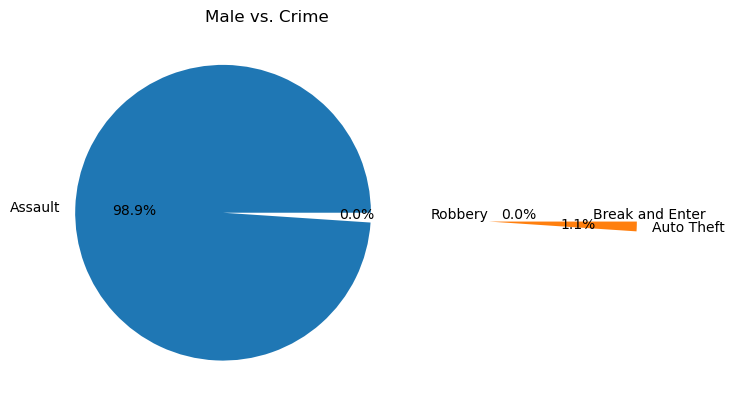

In [54]:
explode = (0.3, 1.5, 1.1, 0.005)
fig, ax = plt.subplots()
ax.pie(size_2016[1], explode=explode, labels=l, autopct='%1.1f%%')
ax.set_title("Male vs. Crime")
plt.show()

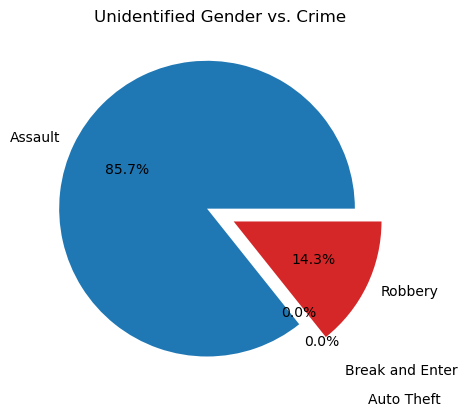

In [58]:
explode = (0.1, 0.5, 0.25, 0.1)
fig, ax = plt.subplots()
ax.pie(size_2016[2], explode=explode, labels=l, autopct='%1.1f%%')
ax.set_title("Unidentified Gender vs. Crime")
plt.show()

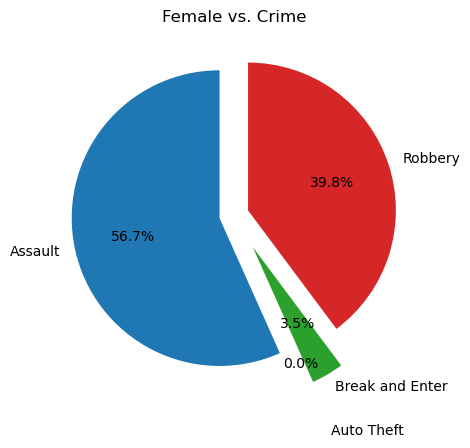

In [59]:
explode = (0.1, 0.5, 0.25, 0.1)
fig, ax = plt.subplots()
ax.pie(size_2021[0], explode=explode, labels=l, autopct='%1.1f%%',startangle=90)
ax.set_title("Female vs. Crime")
plt.show()

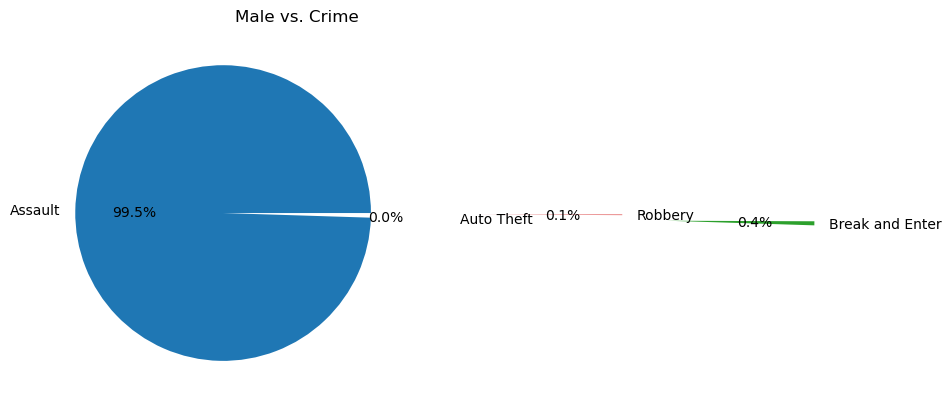

In [68]:
explode = (0.5, 0, 2.5, 1.2)
fig, ax = plt.subplots()
ax.pie(size_2021[1], explode=explode, labels=l, autopct='%1.1f%%')
ax.set_title("Male vs. Crime")
plt.show()

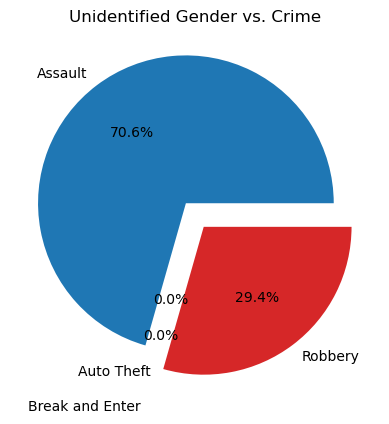

In [71]:
explode = (0.1, 0, 0.25, 0.1)
fig, ax = plt.subplots()
ax.pie(size_2021[2], explode=explode, labels=l, autopct='%1.1f%%')
ax.set_title("Unidentified Gender vs. Crime")
plt.show()

In [ ]:
#Analyst Crime_vs_Geneder 2016:
From 2016, the female victims achived higher of Assault crime with 85.7%, besides that robbery
was a second higher as a same year nearly 39.8%. Surprisingly, the male victims occupied almost percentage of assalt crime
around 98.9% and only small percentage of Break and enter auto theft. Additionaly, the unidentified gender was the highest victims
of assault crimes approximately 85.7%, also the robbery crimes was presented 14.3% of unindentified gender victims.
As we can see that the victim of assault crime was deverisity of gender and age from year to year. 
#Analyst Crime_vs_Geneder 2021:
From 2021, the assault crime was achived 56.7% in female victims compared to 2016, which was significant decrease 
almost 30%. However, the robbery crime maintained stable from 2016 and 2021 nearly 39.8% in female victims. 
Furthermore, the break and enter percentage was slightly increase from 0.5% to 3.5% of 2016 to 2021 in femal victims. 
The male victims occupied almost percentage of assalt crime around 95.95% and only small percentage of Break and enter, 
compared to percentage of those crimes in 2016 was sligtly changing.
The unidentified gender victims of assults crime decreased 15% compared to 2016 from 85.7% to 70.6%. 
besides that the robbery crime was incresed significantly around 29.4% compared to 2016 was onlt 14.3%.
According to the data was analyzed that the main crimes in Toronto was Assault and Robbery crimes. 
Also, those crimes happended for all of age and genders.
